<a href="https://colab.research.google.com/github/NeonHalo17/EDA/blob/main/EDA_DA_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#https://github.com/NeonHalo17/EDA/blob/main/EDA_DA_I.ipynb
#21BCE0359
#EDA

**MODULE 2**

Loading Dataset

In [1]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/salemprakash/EDA/main/Data/Males.csv")

df.head()

,rownames,nr,year,school,exper,union,ethn,maried,health,wage,industry,occupation,residence
0,1,13,1980,14,1,no,other,no,no,1.197540,Business_and_Repair_Service,Service_Workers,north_east
1,2,13,1981,14,2,yes,other,no,no,1.853060,Personal_Service,Service_Workers,north_east
2,3,13,1982,14,3,no,other,no,no,1.344462,Business_and_Repair_Service,Service_Workers,north_east
3,4,13,1983,14,4,no,other,no,no,1.433213,Business_and_Repair_Service,Service_Workers,north_east
4,5,13,1984,14,5,no,other,no,no,1.568125,Personal_Service,"Craftsmen, Foremen_and_kindred",north_east


Dataset Dimensions

In [2]:
df.shape

(4360, 13)

Dataset Summary

In [3]:
df.describe()

,rownames,nr,year,school,exper,wage
count,4360.000000,4360.000000,4360.000000,4360.000000,4360.000000,4360.000000
mean,2180.500000,5262.058716,1983.500000,11.766972,6.514679,1.649147
std,1258.767916,3496.149815,2.291551,1.746181,2.825873,0.532609
min,1.000000,13.000000,1980.000000,3.000000,0.000000,-3.579079
25%,1090.750000,2329.000000,1981.750000,11.000000,4.000000,1.350717
50%,2180.500000,4569.000000,1983.500000,12.000000,6.000000,1.671143
75%,3270.250000,8406.000000,1985.250000,12.000000,9.000000,1.991086
max,4360.000000,12548.000000,1987.000000,16.000000,18.000000,4.051860


Data types and null values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4360 entries, 0 to 4359
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   rownames    4360 non-null   int64  
 1   nr          4360 non-null   int64  
 2   year        4360 non-null   int64  
 3   school      4360 non-null   int64  
 4   exper       4360 non-null   int64  
 5   union       4360 non-null   object 
 6   ethn        4360 non-null   object 
 7   maried      4360 non-null   object 
 8   health      4360 non-null   object 
 9   wage        4360 non-null   float64
 10  industry    4360 non-null   object 
 11  occupation  4360 non-null   object 
 12  residence   3115 non-null   object 
dtypes: float64(1), int64(5), object(7)
memory usage: 442.9+ KB


Data deduplication

In [5]:
df_deduplicated = df.drop_duplicates()

2. Replacing values: Replace 'yes' with 1 and 'no' with 0 in the columns 'union', 'maried', and 'health'


In [6]:
df_replaced = df_deduplicated.replace({'yes': 1, 'no': 0})

<ipython-input-6-059f68b87efb>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_replaced = df_deduplicated.replace({'yes': 1, 'no': 0})


Discretization and binning: Bin the 'wage' column into categories (low, medium, high)


In [7]:
# Define wage bins and labels
wage_bins = [df_replaced['wage'].min(), 1.5, 2.5, df_replaced['wage'].max()]
wage_labels = ['Low', 'Medium', 'High']

Apply Binning

In [8]:
df_replaced['wage_bin'] = pd.cut(df_replaced['wage'], bins=wage_bins, labels=wage_labels, include_lowest=True)

Handling missing data: Check for missing data

In [9]:
df_replaced.isnull().sum()

,0
rownames,0
nr,0
year,0
school,0
exper,0
union,0
ethn,0
maried,0
health,0
wage,0


Fill missing numeric data with the mean and categorical data with the mode

In [10]:
df_filled = df_replaced.fillna({
    'nr': df_replaced['nr'].mean(),
    'school': df_replaced['school'].mean(),
    'exper': df_replaced['exper'].mean(),
    'union': df_replaced['union'].mode()[0],
    'ethn': df_replaced['ethn'].mode()[0],
    'maried': df_replaced['maried'].mode()[0],
    'health': df_replaced['health'].mode()[0],
    'wage': df_replaced['wage'].mean(),
    'industry': df_replaced['industry'].mode()[0],
    'occupation': df_replaced['occupation'].mode()[0],
    'residence': df_replaced['residence'].mode()[0]
})

In [ ]:
df_filled.head()

,rownames,nr,year,school,exper,union,ethn,maried,health,wage,industry,occupation,residence,wage_bin
0,1,13,1980,14,1,0,other,0,0,1.197540,Business_and_Repair_Service,Service_Workers,north_east,Low
1,2,13,1981,14,2,1,other,0,0,1.853060,Personal_Service,Service_Workers,north_east,Medium
2,3,13,1982,14,3,0,other,0,0,1.344462,Business_and_Repair_Service,Service_Workers,north_east,Low
3,4,13,1983,14,4,0,other,0,0,1.433213,Business_and_Repair_Service,Service_Workers,north_east,Low
4,5,13,1984,14,5,0,other,0,0,1.568125,Personal_Service,"Craftsmen, Foremen_and_kindred",north_east,Medium


Check null values after filling

In [11]:
df_filled.isnull().sum()

,0
rownames,0
nr,0
year,0
school,0
exper,0
union,0
ethn,0
maried,0
health,0
wage,0


**MODULE 3**

Library

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

Univariate Analysis on Wage, School and exper columns

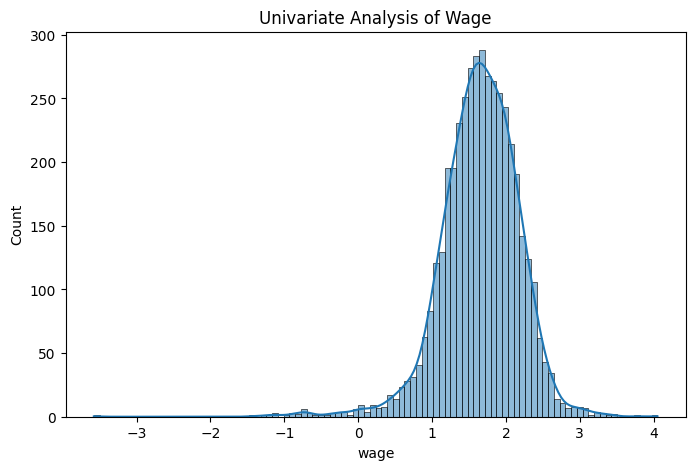

In [13]:
plt.figure(figsize=(8, 5))
sns.histplot(df_filled['wage'], kde=True)
plt.title('Univariate Analysis of Wage')
plt.show()

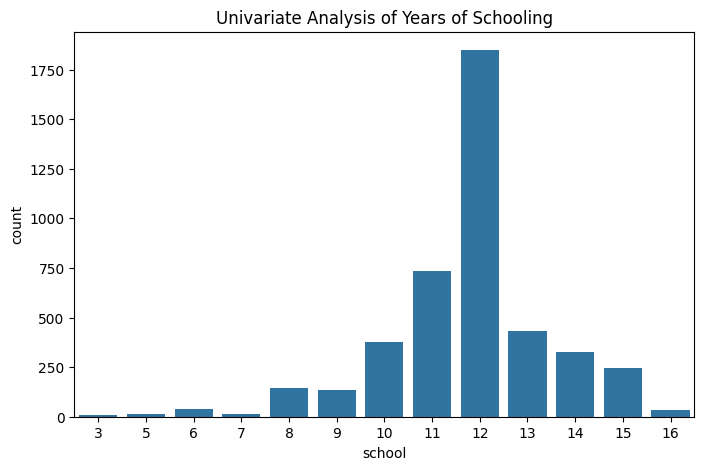

In [14]:
plt.figure(figsize=(8, 5))
sns.countplot(x='school', data=df_filled)
plt.title('Univariate Analysis of Years of Schooling')
plt.show()

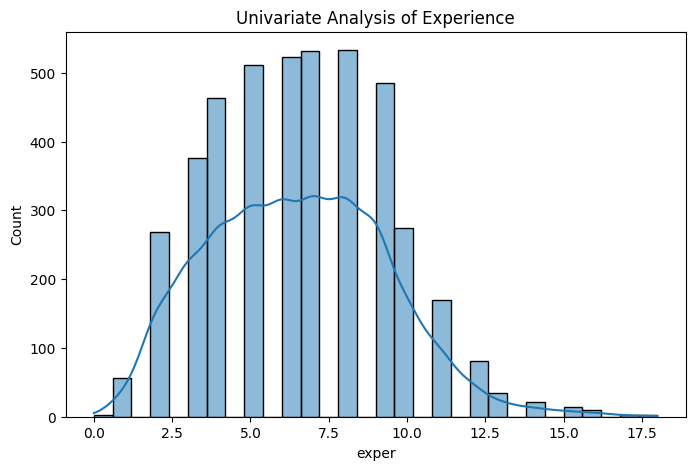

In [15]:
plt.figure(figsize=(8, 5))
sns.histplot(df_filled['exper'], kde=True)
plt.title('Univariate Analysis of Experience')
plt.show()

Bivariate Analysis of Wage vs School and Wage vs experience

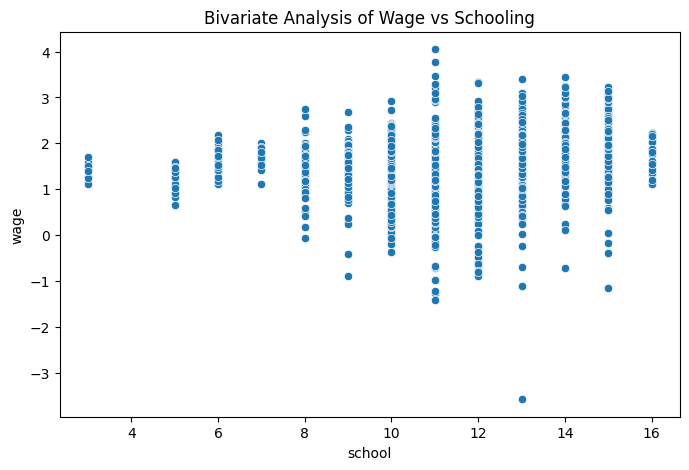

In [16]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='school', y='wage', data=df_filled)
plt.title('Bivariate Analysis of Wage vs Schooling')
plt.show()

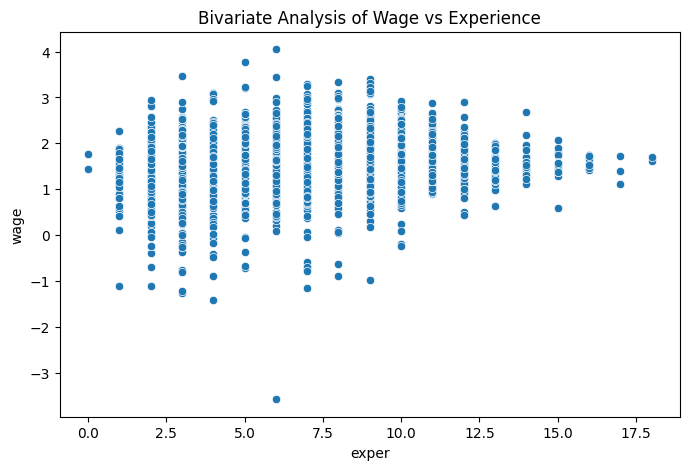

In [17]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='exper', y='wage', data=df_filled)
plt.title('Bivariate Analysis of Wage vs Experience')
plt.show()

Multivariate Analysis of Wage, School and experience altogether

<Figure size 1000x600 with 0 Axes>

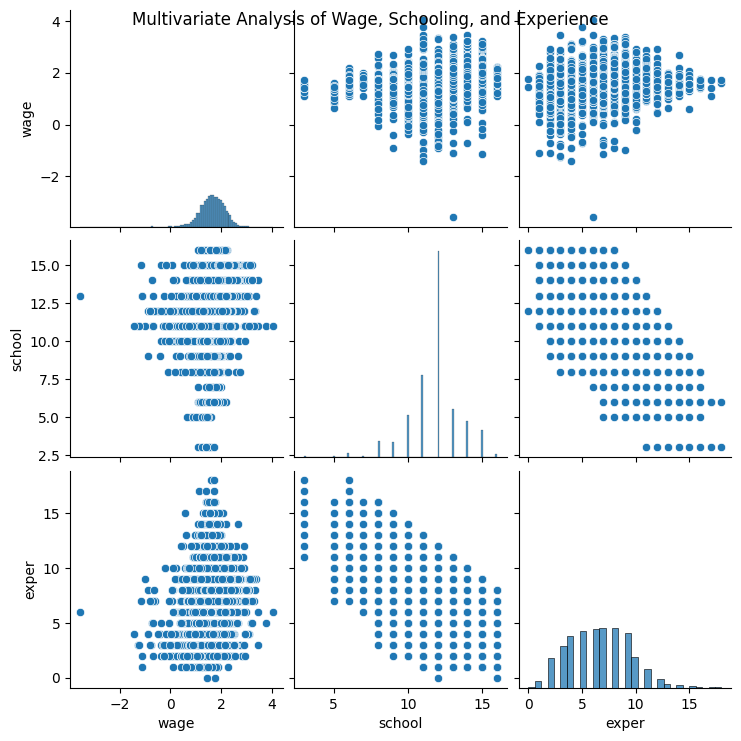

In [18]:
plt.figure(figsize=(10, 6))
sns.pairplot(df_filled[['wage', 'school', 'exper']])
plt.suptitle('Multivariate Analysis of Wage, Schooling, and Experience')
plt.show()

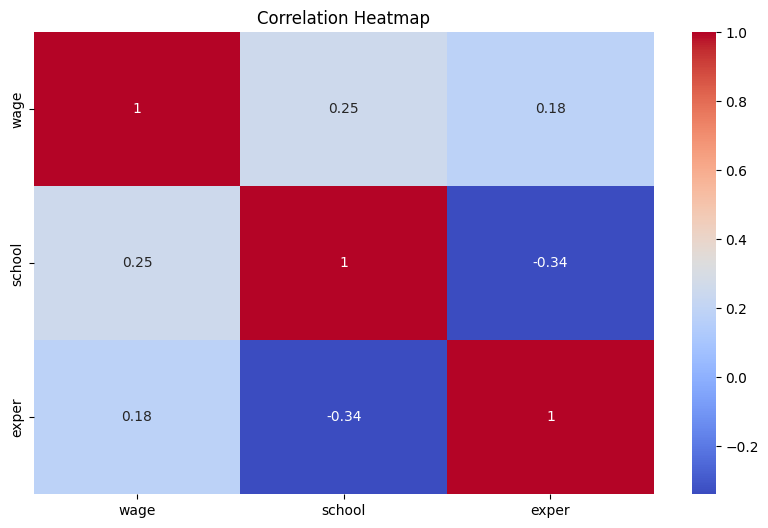

In [19]:
# Heatmap to show correlation among all numeric features
plt.figure(figsize=(10, 6))
sns.heatmap(df_filled[['wage', 'school', 'exper']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Time Series Analysis

In [20]:
#Setting year as time based index for TSA
df['year'] = pd.to_datetime(df['year'], format='%Y')
df.set_index('year', inplace=True)

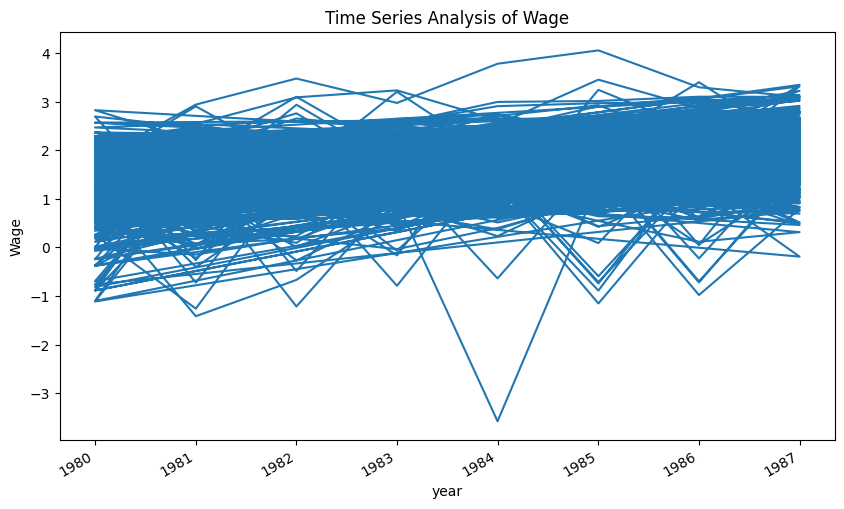

In [21]:
# Plotting time series data for 'wage'
plt.figure(figsize=(10, 6))
df['wage'].plot()
plt.title('Time Series Analysis of Wage')
plt.ylabel('Wage')
plt.show()

In [22]:
df_resampled = df['wage'].resample('Y').mean()

<ipython-input-22-6173c81412b2>:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_resampled = df['wage'].resample('Y').mean()


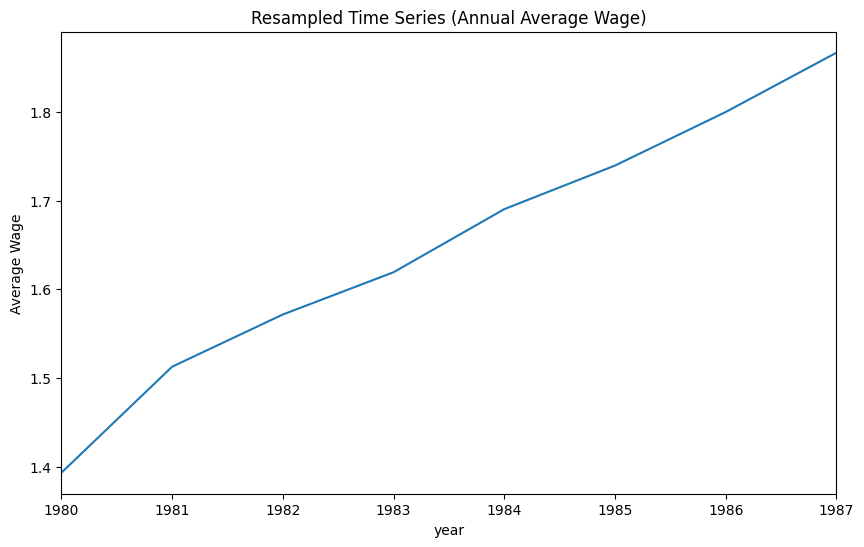

In [23]:
plt.figure(figsize=(10, 6))
df_resampled.plot()
plt.title('Resampled Time Series (Annual Average Wage)')
plt.ylabel('Average Wage')
plt.show()


In [24]:
grouped_data = df.groupby(df.index.year)['wage'].mean()

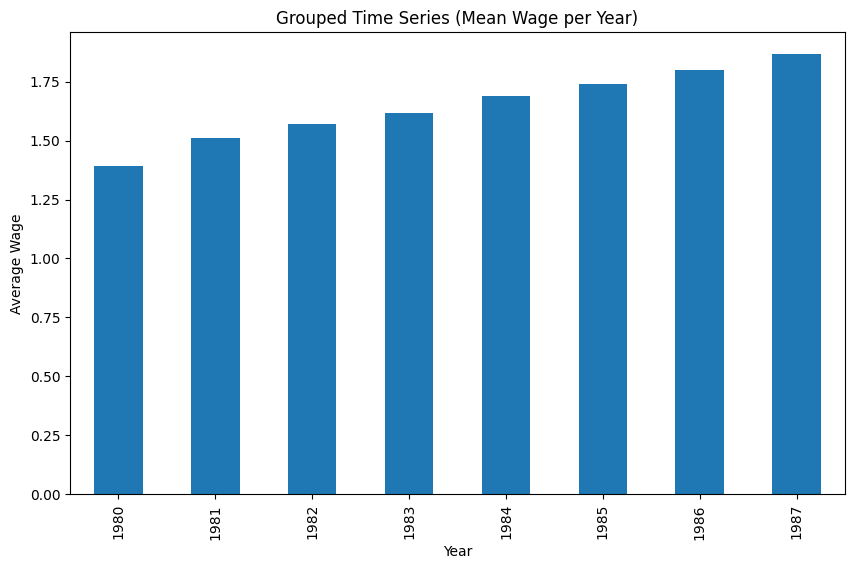

In [25]:
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar')
plt.title('Grouped Time Series (Mean Wage per Year)')
plt.ylabel('Average Wage')
plt.xlabel('Year')
plt.show()

**MODULE 4**

Library

In [26]:
import numpy as np

Statistical summary measures

In [27]:
summary = df.describe()
print(summary)

          rownames            nr       school        exper         wage
count  4360.000000   4360.000000  4360.000000  4360.000000  4360.000000
mean   2180.500000   5262.058716    11.766972     6.514679     1.649147
std    1258.767916   3496.149815     1.746181     2.825873     0.532609
min       1.000000     13.000000     3.000000     0.000000    -3.579079
25%    1090.750000   2329.000000    11.000000     4.000000     1.350717
50%    2180.500000   4569.000000    12.000000     6.000000     1.671143
75%    3270.250000   8406.000000    12.000000     9.000000     1.991086
max    4360.000000  12548.000000    16.000000    18.000000     4.051860


Specific summary statistics for a particular column

In [28]:
wage_summary = df['wage'].describe()
print("\nStatistical Summary for Wage Column:")
print(wage_summary)


Statistical Summary for Wage Column:
count    4360.000000
mean        1.649147
std         0.532609
min        -3.579079
25%         1.350717
50%         1.671143
75%         1.991086
max         4.051860
Name: wage, dtype: float64


Data Eloboration

In [29]:
#creatig new feature wage cateogry based on wage_bins
wage_bins = [df['wage'].min(), 1.5, 2.5, df['wage'].max()]
wage_labels = ['Low', 'Medium', 'High']
df['wage_category'] = pd.cut(df['wage'], bins=wage_bins, labels=wage_labels, include_lowest=True)

print("\nNew Wage Category Feature Added:")
print(df[['wage', 'wage_category']].head())


New Wage Category Feature Added:
                wage wage_category
year                              
1980-01-01  1.197540           Low
1981-01-01  1.853060        Medium
1982-01-01  1.344462           Low
1983-01-01  1.433213           Low
1984-01-01  1.568125        Medium


1-D Statistical Data Analysis

In [30]:
#Analyzing wage distribution
mean_wage = df['wage'].mean()
median_wage = df['wage'].median()
std_wage = df['wage'].std()

print("\n1-D Statistical Analysis for Wage Column:")
print(f"Mean: {mean_wage}, Median: {median_wage}, Standard Deviation: {std_wage}")


1-D Statistical Analysis for Wage Column:
Mean: 1.6491471906705277, Median: 1.6711431179, Standard Deviation: 0.5326094063484761


2-D Statistical Analysis

In [31]:
#Analyzing Wage vs Experience Correlation
correlation = df[['wage', 'exper']].corr()
print("\n2-D Statistical Analysis: Correlation between Wage and Experience:")
print(correlation)


2-D Statistical Analysis: Correlation between Wage and Experience:
           wage     exper
wage   1.000000  0.179405
exper  0.179405  1.000000


Contingency Tables

In [32]:
contingency_table = pd.crosstab(df['wage_category'], df['union'])
print("\nContingency Table between Wage Category and Union Membership:")
print(contingency_table)


Contingency Table between Wage Category and Union Membership:
union            no  yes
wage_category           
Low            1305  253
Medium         1882  777
High            109   34


n-D Statistical Data Analysis

In [33]:
n_d_correlation = df[['wage', 'exper', 'school']].corr()
print("\nN-Dimensional Statistical Data Analysis (Correlation between Wage, Experience, and Schooling):")
print(n_d_correlation)


N-Dimensional Statistical Data Analysis (Correlation between Wage, Experience, and Schooling):
            wage     exper    school
wage    1.000000  0.179405  0.252132
exper   0.179405  1.000000 -0.339251
school  0.252132 -0.339251  1.000000


Scatter plots

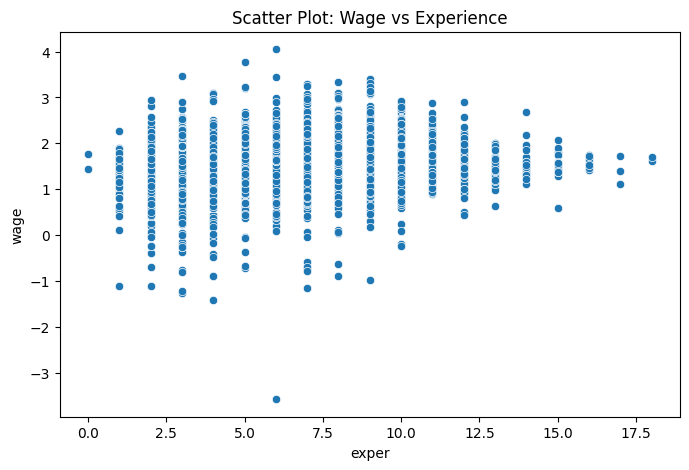

In [34]:
# Scatter Plot: Wage vs Experience
plt.figure(figsize=(8, 5))
sns.scatterplot(x='exper', y='wage', data=df)
plt.title('Scatter Plot: Wage vs Experience')
plt.show()

Dot chart

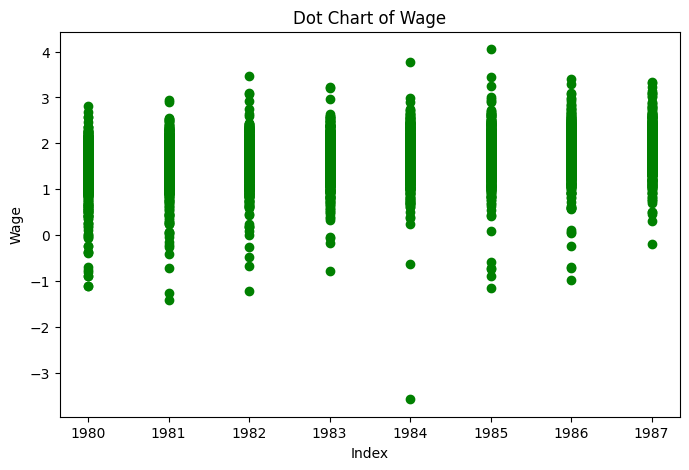

In [35]:
# Dot Chart for 'wage'
plt.figure(figsize=(8, 5))
plt.plot(df['wage'], 'o', color='green')
plt.title('Dot Chart of Wage')
plt.xlabel('Index')
plt.ylabel('Wage')
plt.show()

Bar Plots

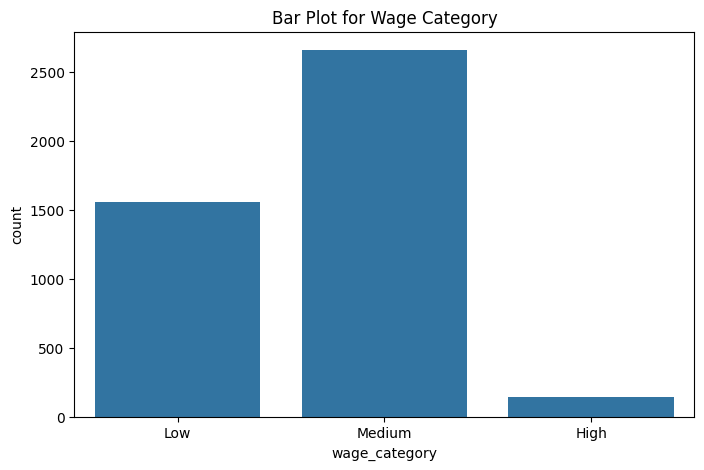

In [36]:
# Bar Plot for Wage Category
plt.figure(figsize=(8, 5))
sns.countplot(x='wage_category', data=df)
plt.title('Bar Plot for Wage Category')
plt.show()

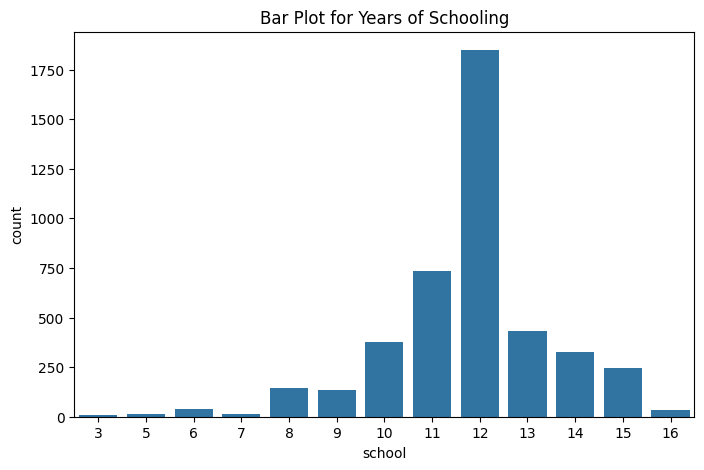

In [37]:
# Bar Plot for Years of Schooling
plt.figure(figsize=(8, 5))
sns.countplot(x='school', data=df)
plt.title('Bar Plot for Years of Schooling')
plt.show()

**MODULE 5**

Spectral Clustering

In [38]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

In [39]:
# Selecting relevant columns and handling missing values in 'residence'
selected_columns = ['school', 'exper', 'wage', 'union', 'ethn', 'maried', 'health', 'industry', 'occupation']
data_selected = df[selected_columns]

# Handling missing values in categorical columns by imputing with the mode
categorical_cols = ['union', 'ethn', 'maried', 'health', 'industry', 'occupation']
imputer = SimpleImputer(strategy='most_frequent')
data_selected[categorical_cols] = imputer.fit_transform(data_selected[categorical_cols])

<ipython-input-39-0e7a2c01d071>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected[categorical_cols] = imputer.fit_transform(data_selected[categorical_cols])


In [40]:
# Encoding categorical features to numerical
label_encoders = {col: LabelEncoder() for col in categorical_cols}
for col in categorical_cols:
    data_selected[col] = label_encoders[col].fit_transform(data_selected[col])

# Scaling numeric columns
scaler = StandardScaler()
numeric_cols = ['school', 'exper', 'wage']
data_selected[numeric_cols] = scaler.fit_transform(data_selected[numeric_cols])

# Displaying the preprocessed data
data_selected.head()

<ipython-input-40-8c28930a94f9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected[col] = label_encoders[col].fit_transform(data_selected[col])
<ipython-input-40-8c28930a94f9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected[col] = label_encoders[col].fit_transform(data_selected[col])
<ipython-input-40-8c28930a94f9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

,school,exper,wage,union,ethn,maried,health,industry,occupation
year,,,,,,,,,
1980-01-01,1.278953,-1.951719,-0.848011,0,2,0,0,1,8
1981-01-01,1.278953,-1.597806,0.382900,1,2,0,0,7,8
1982-01-01,1.278953,-1.243892,-0.572127,0,2,0,0,1,8
1983-01-01,1.278953,-0.889979,-0.405473,0,2,0,0,1,8
1984-01-01,1.278953,-0.536065,-0.152140,0,2,0,0,7,1


In [41]:
from sklearn.cluster import SpectralClustering
spectral_clustering = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
data_selected['spectral_cluster'] = spectral_clustering.fit_predict(data_selected)

<ipython-input-41-69c899d57b36>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected['spectral_cluster'] = spectral_clustering.fit_predict(data_selected)


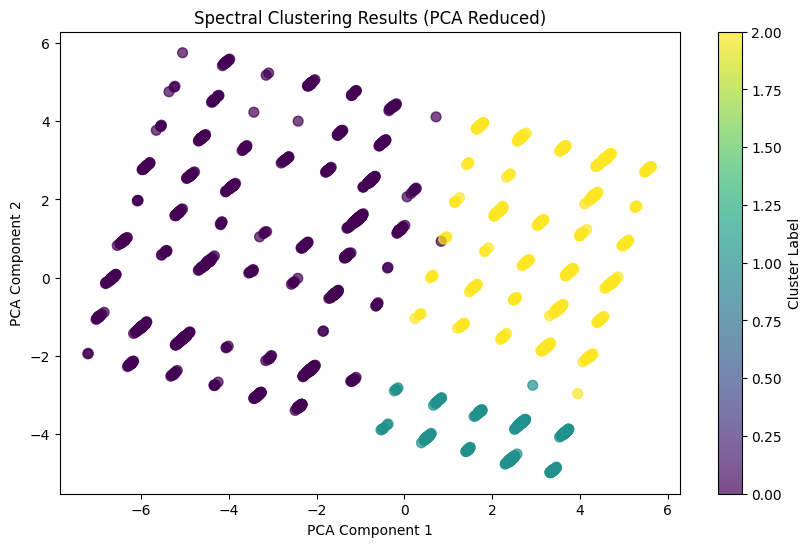

In [42]:
from sklearn.decomposition import PCA

# Perform PCA to reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data_selected[numeric_cols + categorical_cols])

# Plotting the clusters from Spectral Clustering
plt.figure(figsize=(10, 6))
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=data_selected['spectral_cluster'], cmap='viridis', s=50, alpha=0.7)
plt.colorbar(label='Cluster Label')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Spectral Clustering Results (PCA Reduced)")
plt.show()

Minimum Spanning Tree Clustering

In [43]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import single, fcluster
import pandas as pd

In [44]:
# 1. Compute the distance matrix
distance_matrix = squareform(pdist(data_selected, metric='euclidean'))

# 2. Apply single linkage clustering (to get MST)
Z = single(distance_matrix)

# 3. Define clusters by cutting the tree at a threshold
num_clusters = 3  # Define the number of clusters
mst_clusters = fcluster(Z, t=num_clusters, criterion='maxclust')

/usr/local/lib/python3.10/dist-packages/scipy/cluster/hierarchy.py:244: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='single', metric='euclidean')


In [45]:
# Add the cluster labels to the dataset
data_selected['mst_cluster'] = mst_clusters

# Displaying the first few rows to verify
print(data_selected[['mst_cluster']].head())

            mst_cluster
year                   
1980-01-01            1
1981-01-01            1
1982-01-01            1
1983-01-01            1
1984-01-01            1


<ipython-input-45-ebce2cc6d3b2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected['mst_cluster'] = mst_clusters


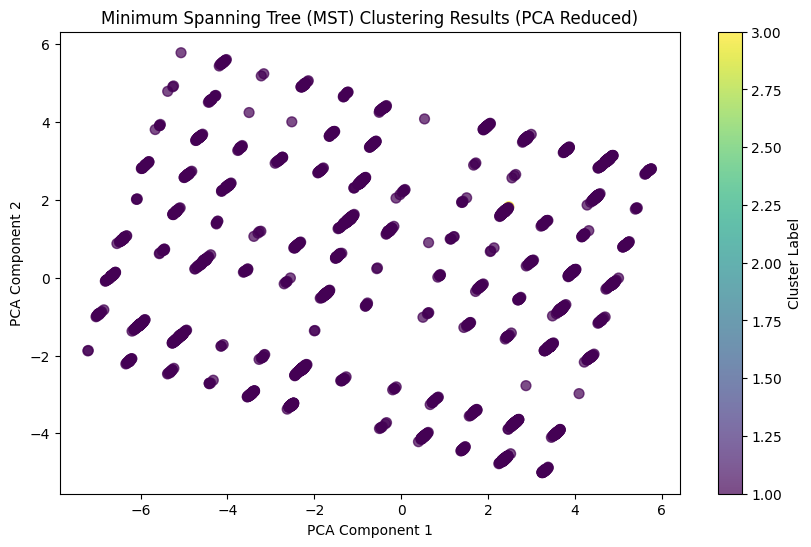

In [46]:
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data_selected.drop(columns=['mst_cluster']))

plt.figure(figsize=(10, 6))
scatter = plt.scatter(data_2d[:, 0], data_2d[:, 1], c=data_selected['mst_cluster'], cmap='viridis', s=50, alpha=0.7)
plt.colorbar(scatter, label='Cluster Label')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Minimum Spanning Tree (MST) Clustering Results (PCA Reduced)")
plt.show()

Hierarchical Agglomerative Clustering

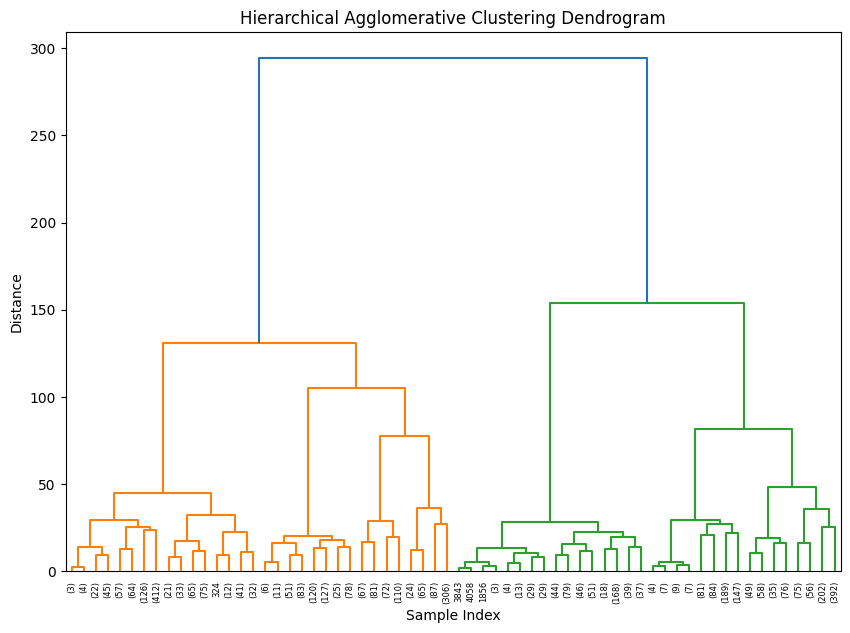

<ipython-input-47-54bc6fc649af>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected['hierarchical_cluster'] = hierarchical_clusters


In [47]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Assuming `data_selected` is your preprocessed DataFrame

# Step 1: Compute the linkage matrix
Z = linkage(data_selected, method='ward')

# Step 2: Plot the dendrogram to visualize hierarchical clustering
plt.figure(figsize=(10, 7))
dendrogram(Z, truncate_mode='level', p=5)
plt.title("Hierarchical Agglomerative Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

# Step 3: Assign clusters based on a chosen distance threshold or number of clusters
from scipy.cluster.hierarchy import fcluster
num_clusters = 3
hierarchical_clusters = fcluster(Z, num_clusters, criterion='maxclust')
data_selected['hierarchical_cluster'] = hierarchical_clusters


Expectation-Maximization(EM) Algorithm

In [50]:
from sklearn.mixture import GaussianMixture

# Ensure only numeric columns are used for clustering
numeric_data = data_selected.select_dtypes(include=[float, int])  # Select only numerical data

# Define and fit the Gaussian Mixture Model
num_clusters = 3  # Adjust based on the desired number of clusters
gmm = GaussianMixture(n_components=num_clusters, random_state=42)
gmm.fit(numeric_data)

# Predict clusters and add them to the DataFrame
data_selected['em_cluster'] = gmm.predict(numeric_data)

# Optional: Get the probability of each point belonging to each cluster
data_selected['cluster_probabilities'] = gmm.predict_proba(numeric_data).max(axis=1)


Outlier Detection

In [52]:
import numpy as np

# Calculate the distances from each data point to its assigned cluster's centroid
centroids = gmm.means_
assigned_centroids = centroids[data_selected['em_cluster']]
distances = np.linalg.norm(numeric_data.values - assigned_centroids, axis=1)

# Define a threshold for outliers; here, using a z-score threshold of 3 for simplicity
threshold = 3
data_selected['outlier'] = distances > (distances.mean() + threshold * distances.std())


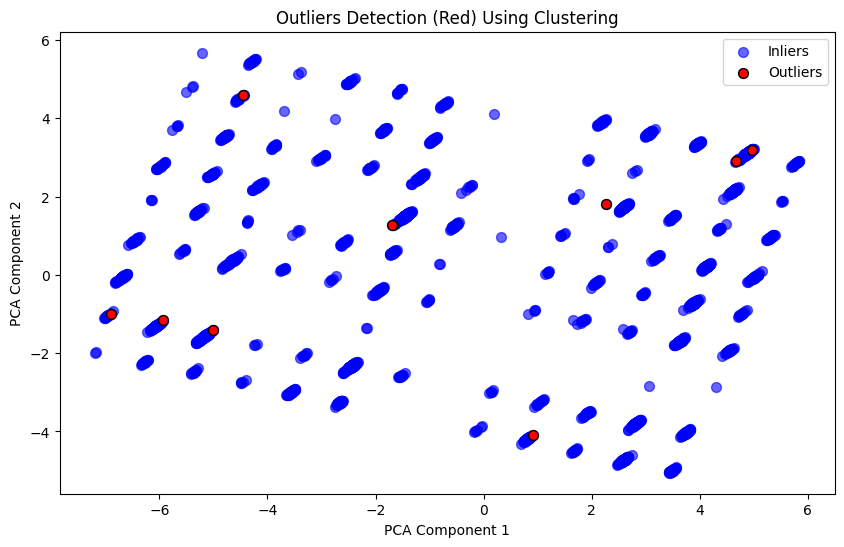

In [53]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming `data_selected` has the 'outlier' column
# Step 1: Reduce dimensions to 2D using PCA for visualization
pca = PCA(n_components=2)
data_2d = pca.fit_transform(numeric_data)

# Step 2: Plot data points, highlighting outliers
plt.figure(figsize=(10, 6))
plt.scatter(data_2d[:, 0], data_2d[:, 1], c='blue', s=50, alpha=0.6, label="Inliers")
plt.scatter(data_2d[data_selected['outlier'], 0], data_2d[data_selected['outlier'], 1],
            c='red', s=50, label="Outliers", edgecolor='k')

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Outliers Detection (Red) Using Clustering")
plt.legend()
plt.show()


**MODULE 6**

PCA

In [54]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)  # Adjust components as needed
pca_data = pca.fit_transform(data_selected)


Single Value Decomposition

In [55]:
from sklearn.decomposition import TruncatedSVD

# Perform SVD
svd = TruncatedSVD(n_components=2, random_state=42)  # Adjust components as needed
svd_data = svd.fit_transform(data_selected)


Factor Analysis

In [56]:
from sklearn.decomposition import FactorAnalysis

# Perform Factor Analysis
factor_analysis = FactorAnalysis(n_components=2, random_state=42)  # Adjust components as needed
fa_data = factor_analysis.fit_transform(data_selected)


Intrinsic Dimensionality

In [57]:
# Determine intrinsic dimensionality using explained variance in PCA
pca_full = PCA()
pca_full.fit(data_selected)
explained_variance_ratio = pca_full.explained_variance_ratio_

# Calculate cumulative variance explained to find intrinsic dimensionality threshold (e.g., 95%)
cumulative_variance = explained_variance_ratio.cumsum()
intrinsic_dimension = (cumulative_variance >= 0.95).argmax() + 1  # First dimension reaching 95% variance


Multidimensional Scaling

In [61]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, max_iter=100, n_init=1, random_state=42)  # Reduce max_iter
mds_data = mds.fit_transform(data_selected.sample(1000, random_state=42))  # Use a subset (e.g., 1000 samples)


Manifold Learning

In [59]:
from sklearn.manifold import Isomap

# Perform Manifold Learning using Isomap
isomap = Isomap(n_components=2)
isomap_data = isomap.fit_transform(data_selected)
